# 군집화: 상황별 와인 추천시스템 - 곁들일 음식 포함

## 데이터 전처리

In [130]:
import pandas as pd

wine_df = pd.read_pickle('wine_df_final.pkl')

,와인이름,영어이름,와인타입,"나라, 와이너리",포도종,도수,당도,산도,바디,탄닌,와이너리이름,와이너리설명,와이너리특징,아로마 딕셔너리,곁들일 음식,음식,아로마 중분류,아로마 소분류,대표 중분류 아로마
0,이기갈 꼬뜨 뒤 론 레드,E.Guigal Cotes du Rhone Rouge,레드 와인,프랑스 > 론 / 이 기갈,"시라 49%, 그르나쉬 48%, 무르베드르 3%",13.0,1,2,4,1.0,이 기갈 E.Guigal,이기갈(E.Guigal)은 오늘날 프랑스 론 최고의 생산자로 꼽힌다. 1946년 에...,"""King of the Rhone"" - 영국의 와인전문지 <디캔터(Decanter)...","{'녹색 과일': ['포도'], '빨간 과일': ['딸기'], '허베이셔스': ['...","차가운 육류요리나 가금류, 붉은육류요리, 치즈",육류 에피타이저,"녹색 과일, 빨간 과일, 허베이셔스","포도, 딸기, 풀","녹색 과일, 빨간 과일"


### 숫자카테고리화: 도수/당도/산도/바디/와인타입

In [243]:
def alcho_cate(x):
    y = 0
    if x < 8: y = 1
    elif x < 16: y = 2
    else: y = 3
        
    return y

def sweet_cate(x):
    y = 0
    if x in [1,2]: y = 2
    elif x in [3,4,5]: y = 1
        
    return y

def acid_cate(x):
    y = 0
    if x in [1,2]: y = 1
    elif x in [3,4]: y = 2
        
    return y

def body_cate(x):
    y = 0
    if x in [2,3]: y = 1
    elif x in [4,5]: y = 2
        
    return y

def type_cate(x):
    y = 0
    if x == '레드 와인': y = 1
    elif x == '화이트 와인': y = 2
    else: y = 3
    return y

In [244]:
wine_df['도수_cate'] = wine_df['도수'].apply(lambda x: alcho_cate(x))
wine_df['당도_cate'] = wine_df['당도'].apply(lambda x: sweet_cate(x))
wine_df['산도_cate'] = wine_df['산도'].apply(lambda x: acid_cate(x))
wine_df['바디_cate'] = wine_df['바디'].apply(lambda x: body_cate(x))
wine_df['타입_cate'] = wine_df['와인타입'].apply(lambda x: type_cate(x))

In [253]:
wine_df

,와인이름,영어이름,와인타입,"나라, 와이너리",포도종,도수,당도,산도,바디,탄닌,...,도수_cate,당도_cate,산도_cate,바디_cate,타입_cate,도수_cate2,당도_cate2,산도_cate2,바디_cate2,타입_cate2
0,이기갈 꼬뜨 뒤 론 레드,E.Guigal Cotes du Rhone Rouge,레드 와인,프랑스 > 론 / 이 기갈,"시라 49%, 그르나쉬 48%, 무르베드르 3%",13.0,1,2,4,1.0,...,2,2,1,2,1,적당함,달지 않음,적당함,끈적임,레드
1,이기갈 꼬뜨 뒤 론 화이트,E.Guigal Cotes du Rhone Blanc,화이트 와인,프랑스 > 론 / 이 기갈,"비오니에 70%, 루산느 10%, 마르산느 9%, 끌레레뜨 8%, 부르불랑 3%",13.0,1,3,3,NaN,...,2,2,2,1,2,적당함,달지 않음,신맛,적당함,화이트
2,이기갈 꼬뜨 로띠 ‘브륀 & 블롱드’,E.Guigal Cot-Rotie ‘Brune & Blonde de Guigal’,레드 와인,프랑스 > 론 / 이 기갈,"시라 96%, 비오니에 4%",13.0,1,3,5,1.0,...,2,2,2,2,1,적당함,달지 않음,신맛,끈적임,레드
3,이기갈 꼬뜨 로띠 ‘샤또 당퓌’,E.Guigal Cote-Rotie ‘Chateau d’Ampuis’,레드 와인,프랑스 > 론 / 이 기갈,"시라 93%, 비오니에 7%",13.0,1,3,5,1.0,...,2,2,2,2,1,적당함,달지 않음,신맛,끈적임,레드
4,이기갈 꽁드리유,E.Guigal Condrieu,화이트 와인,프랑스 > 론 / 이 기갈,비오니에 100%,13.0,1,3,4,NaN,...,2,2,2,2,2,적당함,달지 않음,신맛,끈적임,화이트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,까테나 자파타 까테나 말벡,Catena Zapata Catena Malbec,레드 와인,아르헨티나 > 멘도자 / 까테나 자파타,말백 100%,14.0,1,3,3,1.0,...,2,2,2,1,1,적당함,달지 않음,신맛,적당함,레드
321,까테나 자파타 까테나 알타 샤르도네,Catena Zapata Catena Alta Chardonnay,화이트 와인,아르헨티나 > 멘도자 / 까테나 자파타,샤르도네 100%,13.0,2,3,4,NaN,...,2,2,2,2,2,적당함,달지 않음,신맛,끈적임,화이트
322,까테나 자파타 까테나 알타 말벡,Catena Zapata Catena Alta Malbec,레드 와인,아르헨티나 > 멘도자 / 까테나 자파타,말백 100%,14.0,1,3,4,1.0,...,2,2,2,2,1,적당함,달지 않음,신맛,끈적임,레드
323,까테나 자파타 니카시아 말벡,Catena Zapata Nicasia Malbec,레드 와인,아르헨티나 > 멘도자 / 까테나 자파타,말벡 100%,14.0,1,3,5,1.0,...,2,2,2,2,1,적당함,달지 않음,신맛,끈적임,레드


### 문자카테고리화: 도수/당도/산도/바디/와인타입

In [247]:
def alcho_cate2(x):
    y = ''
    if x < 8: y = '약함'
    elif x < 16: y = '적당함'
    else: y = '강함'
        
    return y

def sweet_cate2(x):
    y = ''
    if x in [1,2]: y = '달지 않음'
    elif x in [3,4,5]: y = '달달함'
        
    return y

def acid_cate2(x):
    y = ''
    if x in [1,2]: y = '적당함'
    elif x in [3,4]: y = '신맛'
        
    return y

def body_cate2(x):
    y = ''
    if x in [2,3]: y = '적당함'
    elif x in [4,5]: y = '끈적임'
        
    return y

def type_cate2(x):
    y = ''
    if x == '레드 와인': y = '레드'
    elif x == '화이트 와인': y = '화이트'
    else: y = '스파클링'
    return y

In [248]:
wine_df['도수_cate2'] = wine_df['도수'].apply(lambda x: alcho_cate2(x))
wine_df['당도_cate2'] = wine_df['당도'].apply(lambda x: sweet_cate2(x))
wine_df['산도_cate2'] = wine_df['산도'].apply(lambda x: acid_cate2(x))
wine_df['바디_cate2'] = wine_df['바디'].apply(lambda x: body_cate2(x))
wine_df['타입_cate2'] = wine_df['와인타입'].apply(lambda x: type_cate2(x))

### 활용 컬럼 분류: 음식/도수/당도category/산도category

In [64]:
wine_df_dish = wine_df[['음식','도수','당도_cate', '산도_cate']]
wine_df_dish 

,음식,도수,당도_cate,산도_cate
0,육류 에피타이저,13.0,2,1
1,매운음식 해산물 sweet디저트,13.0,2,2
2,육류 에피타이저,13.0,2,2
3,육류 에피타이저,13.0,2,2
4,육류,13.0,2,2
...,...,...,...,...
320,육류,14.0,2,2
321,해산물 양식 에피타이저,13.0,2,2
322,육류 에피타이저,14.0,2,2
323,육류 양식 에피타이저,14.0,2,2


### OnehotEncoding: 음식

In [65]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

wine_df['육류'] = np.nan
wine_df['해산물'] = np.nan
wine_df_dish['매운음식'] = np.nan
wine_df_dish['디저트'] = np.nan
wine_df_dish['에피타이저'] = np.nan
wine_df_dish['양식'] = np.nan
wine_df_dish['중국음식'] = np.nan

for idx in range(len(wine_df_dish)):
    if wine_df_dish.loc[idx, '음식'].find('육류') != -1:
        wine_df_dish.loc[idx, '육류'] = 1
    else:
        wine_df_dish.loc[idx, '육류'] = 0
        
    if wine_df_dish.loc[idx, '음식'].find('해산물') != -1:
        wine_df_dish.loc[idx, '해산물'] = 1
    else:
        wine_df_dish.loc[idx, '해산물'] = 0
        
    if wine_df_dish.loc[idx, '음식'].find('매운음식') != -1:
        wine_df_dish.loc[idx, '매운음식'] = 1
    else:
        wine_df_dish.loc[idx, '매운음식'] = 0
        
    if wine_df_dish.loc[idx, '음식'].find('디저트') != -1:
        wine_df_dish.loc[idx, '디저트'] = 1
    else:
        wine_df_dish.loc[idx, '디저트'] = 0
        
    if wine_df_dish.loc[idx, '음식'].find('에피타이저') != -1:
        wine_df_dish.loc[idx, '에피타이저'] = 1
    else:
        wine_df_dish.loc[idx, '에피타이저'] = 0
        
    if wine_df_dish.loc[idx, '음식'].find('양식') != -1:
        wine_df_dish.loc[idx, '양식'] = 1
    else:
        wine_df_dish.loc[idx, '양식'] = 0
    
    if wine_df_dish.loc[idx, '음식'].find('중국음식') != -1:
        wine_df_dish.loc[idx, '중국음식'] = 1
    else:
        wine_df_dish.loc[idx, '중국음식'] = 0
        
    
        
wine_df_dish[['육류','해산물','매운음식','디저트','에피타이저', '양식','중국음식']] = wine_df_dish[['육류','해산물','매운음식','디저트','에피타이저','양식','중국음식']].astype(int)
wine_df_dish = wine_df_dish.drop('음식', axis = 1)
wine_df_dish.head()

,도수,당도_cate,산도_cate,매운음식,디저트,에피타이저,양식,중국음식,육류,해산물
0,13.0,2,1,0,0,1,0,0,1,0
1,13.0,2,2,1,1,0,0,0,0,1
2,13.0,2,2,0,0,1,0,0,1,0
3,13.0,2,2,0,0,1,0,0,1,0
4,13.0,2,2,0,0,0,0,0,1,0


### OnehotEncoding: 당도/산도

In [66]:
wine_df_dish[['당도_cate','산도_cate']] = wine_df_dish[['당도_cate','산도_cate']] - 1
wine_df_dish.head()

,도수,당도_cate,산도_cate,매운음식,디저트,에피타이저,양식,중국음식,육류,해산물
0,13.0,1,0,0,0,1,0,0,1,0
1,13.0,1,1,1,1,0,0,0,0,1
2,13.0,1,1,0,0,1,0,0,1,0
3,13.0,1,1,0,0,1,0,0,1,0
4,13.0,1,1,0,0,0,0,0,1,0


## 군집화: K-Means

In [52]:
wine_df_dish.columns

Index(['도수', '당도_cate', '매운음식', '디저트', '에피타이저', '양식', '중국음식', '육류', '해산물'], dtype='object')

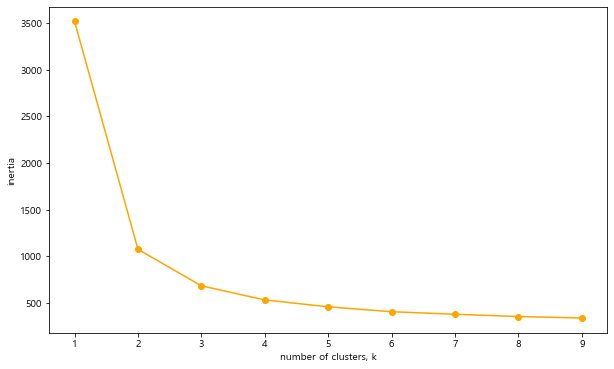

In [71]:
# 군집 최적 개수 찾기


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertias = []
for k in range(1,10):
    model = KMeans(n_clusters=k) 
    model.fit(wine_df_dish[['당도_cate', '산도_cate',
                            '육류', '해산물', '매운음식',
                            '디저트', '에피타이저','양식','중국음식', 
                            '도수']])
    inertias.append(model.inertia_)


plt.figure(figsize = (10,6))
plt.plot(range(1,10), inertias, '-o', color = 'orange')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range(1,10))

plt.show()

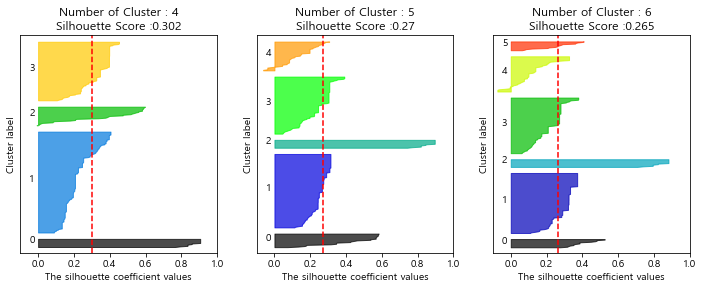

In [80]:
# 실루엣 계수 확인

data = wine_df_dish[['당도_cate','산도_cate', '육류', '해산물', '매운음식',
                           '디저트', '에피타이저', '양식','중국음식','도수']]
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

        
cluster_list = [4,5,6]
visualize_silhouette(cluster_list, data)

In [68]:
data = wine_df_dish[['당도_cate','산도_cate', '육류', '해산물', '매운음식',
                           '디저트', '에피타이저', '양식','중국음식','도수']]

## 군집화
import numpy as np
import warnings  
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False     # 마이너스 부호 깨짐 방지


# 클러스터링 생성
estimator = KMeans(n_clusters = 5)
cluster_ids = estimator.fit_predict(data)
cluster_ids



#주성분분석:: 차원축소
from sklearn.decomposition import PCA
import seaborn as sns


# 2차원으로 축소
pca = PCA(n_components = 2) # n_components = 주성분의 갯수를 결정
pca.fit(data) # 각도를 찾음


# 축소된 차원으로 데이터를 변환
data2 = pd.DataFrame(data = pca.transform(data), columns=['pca1', 'pca2'])
data2['와인이름'] = wine_df['와인이름']
data2 = data2.set_index('와인이름')
display(data2)
pca.explained_variance_ratio_

,pca1,pca2
와인이름,,
이기갈 꼬뜨 뒤 론 레드,-0.870018,-0.072520
이기갈 꼬뜨 뒤 론 화이트,-0.825804,1.000482
이기갈 꼬뜨 로띠 ‘브륀 & 블롱드’,-0.863379,-0.081454
이기갈 꼬뜨 로띠 ‘샤또 당퓌’,-0.863379,-0.081454
이기갈 꽁드리유,-0.868976,-0.395293
...,...,...
까테나 자파타 까테나 말벡,-1.868155,-0.366596
까테나 자파타 까테나 알타 샤르도네,-0.857065,0.525380
까테나 자파타 까테나 알타 말벡,-1.862558,-0.052757


array([0.88944409, 0.02682587])

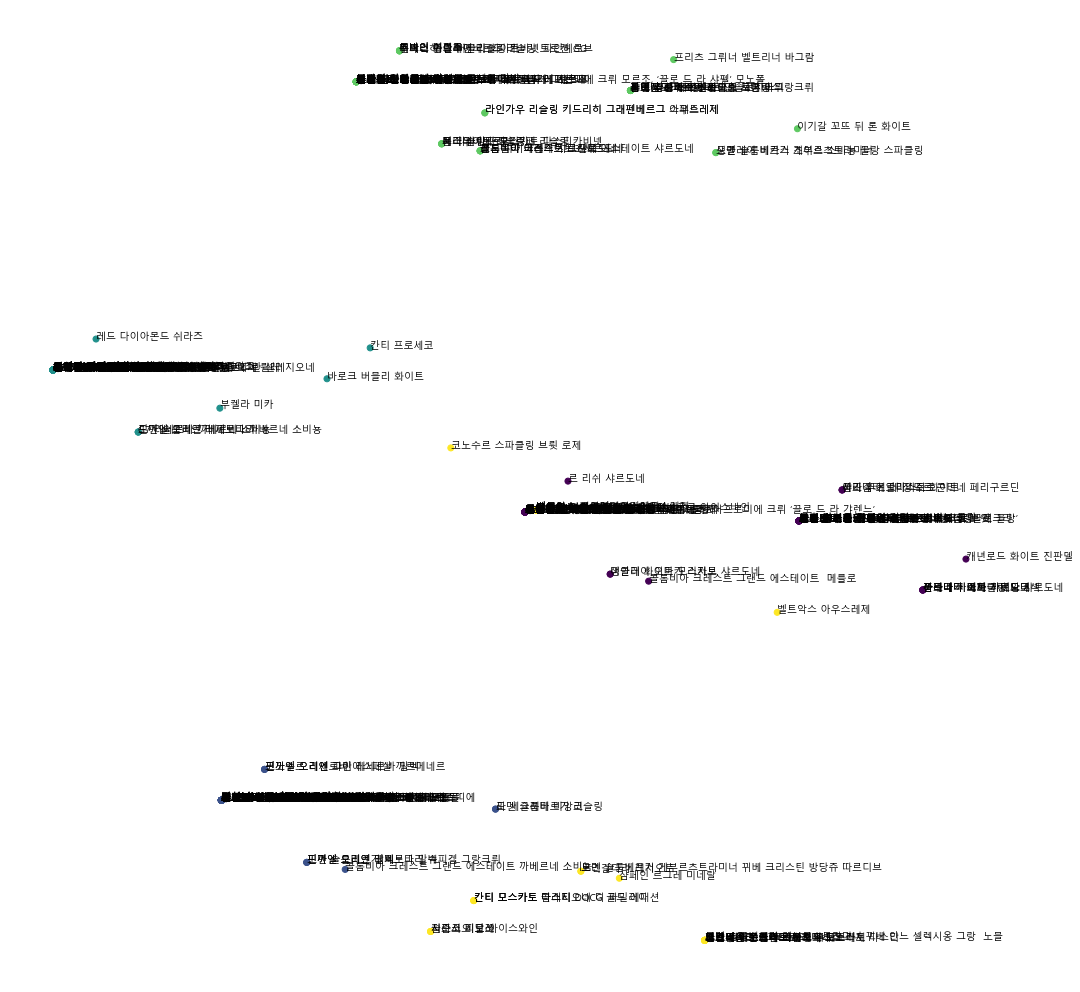

In [23]:
#시각화
# 플롯
plt.figure(figsize=(18,18))
plt.scatter(data2['pca1'], data2['pca2'], c=cluster_ids)
plt.xlabel("pca1")
plt.ylabel("pca2")


# 범례 달기
for x, p1, p2 in data2.itertuples():
    plt.annotate(x, (p1, p2))
plt.axis('off')
# plt.savefig('유동인구_군집화7차원_cluster4개_글씨없음.png')    
plt.show()

### 군집화 cluster id 컬럼 생성

In [69]:
data3 = wine_df_dish.copy()

data3['clusterid'] = cluster_ids
data3

,도수,당도_cate,산도_cate,매운음식,디저트,에피타이저,양식,중국음식,육류,해산물,clusterid
0,13.0,1,0,0,0,1,0,0,1,0,3
1,13.0,1,1,1,1,0,0,0,0,1,3
2,13.0,1,1,0,0,1,0,0,1,0,3
3,13.0,1,1,0,0,1,0,0,1,0,3
4,13.0,1,1,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
320,14.0,1,1,0,0,0,0,0,1,0,0
321,13.0,1,1,0,0,1,1,0,0,1,3
322,14.0,1,1,0,0,1,0,0,1,0,0
323,14.0,1,1,0,0,1,1,0,1,0,0


In [70]:
for i in range(5):
    display(data3[data3['clusterid'] == i].describe())

,도수,당도_cate,산도_cate,매운음식,디저트,에피타이저,양식,중국음식,육류,해산물,clusterid
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,14.196078,0.960784,0.921569,0.049020,0.068627,0.539216,0.313725,0.029412,0.931373,0.196078,0.0
std,0.545716,0.195066,0.270177,0.216975,0.254068,0.500921,0.466298,0.169792,0.254068,0.398989,0.0
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,14.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,14.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


,도수,당도_cate,산도_cate,매운음식,디저트,에피타이저,양식,중국음식,육류,해산물,clusterid
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.0
mean,6.700000,0.250000,0.950000,0.150000,0.450000,0.450000,0.300000,0.0,0.700000,0.300000,1.0
std,1.031095,0.444262,0.223607,0.366348,0.510418,0.510418,0.470162,0.0,0.470162,0.470162,0.0
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
25%,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
50%,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.0
75%,7.000000,0.250000,1.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0
max,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0


,도수,당도_cate,산도_cate,매운음식,디저트,에피타이저,양식,중국음식,육류,해산물,clusterid
count,15.0,15.0,15.0,15.0,15.0,15.000000,15.000000,15.0,15.000000,15.000000,15.0
mean,1.0,1.0,1.0,0.0,0.0,0.733333,0.133333,0.0,0.933333,0.400000,2.0
std,0.0,0.0,0.0,0.0,0.0,0.457738,0.351866,0.0,0.258199,0.507093,0.0
min,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.0
25%,1.0,1.0,1.0,0.0,0.0,0.500000,0.000000,0.0,1.000000,0.000000,2.0
50%,1.0,1.0,1.0,0.0,0.0,1.000000,0.000000,0.0,1.000000,0.000000,2.0
75%,1.0,1.0,1.0,0.0,0.0,1.000000,0.000000,0.0,1.000000,1.000000,2.0
max,1.0,1.0,1.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,2.0


,도수,당도_cate,산도_cate,매운음식,디저트,에피타이저,양식,중국음식,육류,해산물,clusterid
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0
mean,12.758824,0.911765,0.964706,0.052941,0.088235,0.594118,0.282353,0.035294,0.735294,0.488235,3.0
std,0.429061,0.284475,0.185067,0.224578,0.284475,0.492513,0.451474,0.185067,0.442480,0.501338,0.0
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
50%,13.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.0
75%,13.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.0
max,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0


,도수,당도_cate,산도_cate,매운음식,디저트,에피타이저,양식,중국음식,육류,해산물,clusterid
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0
mean,10.000000,0.555556,0.944444,0.388889,0.500000,0.388889,0.166667,0.055556,0.555556,0.444444,4.0
std,0.766965,0.511310,0.235702,0.501631,0.514496,0.501631,0.383482,0.235702,0.511310,0.511310,0.0
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
25%,9.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
50%,10.000000,1.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,4.0
75%,10.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.0
max,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.0


In [58]:
wine_df['cluster_id'] = cluster_ids

In [550]:
wine_df['상황별추천 군집화_n'] = cluster_ids

In [552]:
wine_df['상황별추천 군집화'] = np.nan
# 가족과 함께
# 달콤한 친구와 함께
# 술린이 연인과함께
# 술른이 연인과함께
# 화끈한 친구와 함께

clu = ['가족과 함께','달콤한 친구와 함께','술린이 연인과함께','술른이 연인과함께','화끈한 친구와 함께']

for i in range(5):
    wine_df.loc[wine_df['상황별추천 군집화_n']==i,'상황별추천 군집화'] = clu[i]
        

In [556]:
wine_df['상황별추천 군집화'].value_counts()

가족과 함께        170
술른이 연인과함께     102
술린이 연인과함께      20
화끈한 친구와 함께     18
달콤한 친구와 함께     15
Name: 상황별추천 군집화, dtype: int64

In [557]:
wine_df.to_csv('wine_df_final_clustering.csv')